In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 14

## READ data 
import pandas as pd
import numpy as np
import math, sys

def read_data(filename, rank):
    frame = pd.read_csv(filename, sep=' ',header=None,
                        names=['time', 'current_state', 'action', 'reward', 'next_state', 'total_reward', 'done',
                               'episode', 'step', 'policy_type', 'epsilon'])
    del frame['current_state']
    del frame['next_state']
    frame['time'] = pd.to_datetime(frame['time'], unit='ns')
    frame = frame[frame.done == True]
    frame = frame.reset_index()
    frame['rank'] = int(rank)
    return frame

In [3]:
import os
def save_reward_plot(results_dir):
    df_ranks = []
    rank=0
    # Candle directory stucture
    results_dir = results_dir
    for filename in os.listdir(results_dir):
        if filename.endswith(".log"):
            rank+=1
            #print('rank {}: filename:{}'.format(rank,filename))
            df = read_data(results_dir + filename,rank)
            df_ranks.append(df)
            
    df_merged = pd.concat(df_ranks)
    df_merged = df_merged.dropna()
    time_min = df_merged.time.min()
    time_max = df_merged.time.max()
    print('time_min',time_min)
    print('time_diff',time_max-time_min)
    
    df_merged['rel_time'] = [idx - time_min for idx in df_merged.time]
    #df_merged['rel_time'] = df_merged['rel_time'].total_seconds()
    #df_merged['rel_time'] = df_merged.rel_time.total_seconds()
    #df_merged.set_index('rel_time')
    #df_merged = df_merged.reset_index()
    df_merged.sort_values(by=['rel_time'], inplace=True)
    return df_merged

Node path:/projects/users/vinayr/ExaLearn/ExaRL/eb_results/eb_results_0.0_priority/EXP000/RUN000/
('time_min', Timestamp('1970-01-01 00:00:01.620155983'))
('time_diff', Timedelta('0 days 00:00:00.000000'))
(1001, 13)
Node path:/projects/users/vinayr/ExaLearn/ExaRL/eb_results/eb_results_0.7_priority/EXP000/RUN000/
('time_min', Timestamp('1970-01-01 00:00:01.620155474'))
('time_diff', Timedelta('0 days 00:00:00.000000'))
(1002, 13)
Node path:/projects/users/vinayr/ExaLearn/ExaRL/eb_results/eb_results_1.0_priority/EXP000/RUN000/
('time_min', Timestamp('1970-01-01 00:00:01.620156942'))
('time_diff', Timedelta('0 days 00:00:00.000000'))
(1000, 13)


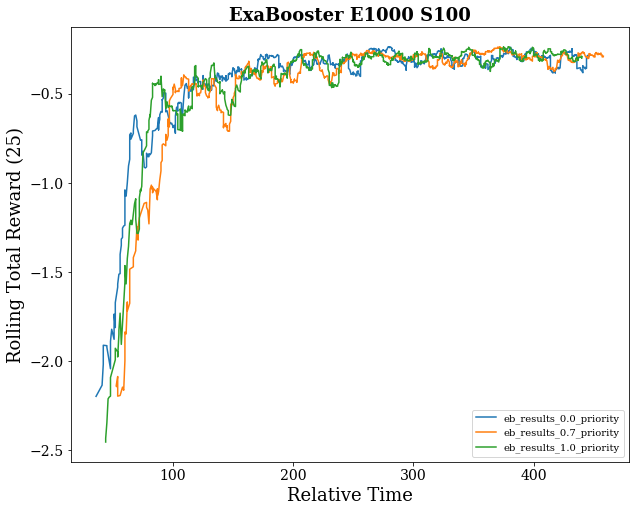

In [5]:
rolling_setting=25
fig,ax = plt.subplots(1, 1,figsize=(10,8))
plt.title('ExaBooster E1000 S100')

base_dir = '/projects/users/vinayr/ExaLearn/ExaRL/eb_results/'
nodes_dir = ['eb_results_0.0_priority', 'eb_results_0.7_priority', 'eb_results_1.0_priority']


episodes_per_nodes = []
for node_dir in nodes_dir:
    current_dir =base_dir+node_dir+'/EXP000/RUN000/'
    # current_dir =base_dir+node_dir
    print('Node path:{}'.format(current_dir))
    merged_df = save_reward_plot(current_dir)
    merged_df['total_reward_roll'] = merged_df['total_reward'].rolling(rolling_setting).mean()
    print((merged_df.shape))
    #merged_df = merged_df.cummax()
    plt.plot(merged_df['rel_time'],merged_df['total_reward_roll'], label='{}'.format(node_dir))
    episodes_per_nodes.append(len(merged_df))

#print(merged_df.head(5))  
plt.xlabel('Relative Time')
plt.ylabel('Rolling Total Reward ({})'.format(rolling_setting))
#plt.xlim(00,2500)
#plt.ylim(-20,0)
plt.legend(loc="lower right")
plt.show()